In [1]:
# Moagi Makwale Adrian
# Data Science Asssessment
# submission date 24/09/2019

In [2]:
#we import pandas library which will help us for data analysis and exploration

import pandas as pd

In [3]:
#reading the data from Desktop into the notebook

data = pd.read_csv('assessment_data.csv')

In [4]:
data.head()

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,bigollo-16,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,cantor-33,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,cantor-33,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,cantor-33,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,cantor-33,blue,25.0000,1,sigma,204.415716


# Step 1 - Cleaning and Data Preparation

In [5]:
#checking the null values for feature_1 variable (False = Not Null Values, True = Null Values) using isnull() function
#we found one null value in feature_1 which will not be good for our analysis

data['feature_1'].isnull().value_counts()

False    1308
True        1
Name: feature_1, dtype: int64

In [6]:
# Lets replace the null value with the average of this variable

data = data.fillna(data['feature_1'].mean())

In [7]:
#checking the null values for feature_9 variable (False = Not Null Values, True = Null Values)
# No Null values

data['feature_9'].isnull().value_counts()

False    1309
Name: feature_9, dtype: int64

In [8]:
#checking the null values for our target variable target_var (False = Not Null Values, True = Null Values)
#we have no nulls in our target variable which is good

data['target_var'].isnull().value_counts()

False    1309
Name: target_var, dtype: int64

In [9]:
# lets compute the summary statistics for our data
data.describe()

,target_var,feature_1,feature_2,feature_3,feature_6,feature_7,feature_9
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,33.295479,0.385027,0.498854,30.567133,2.294882,101.794120
std,0.486055,51.738879,0.865560,1.041658,12.955690,0.837836,50.890853
min,0.000000,0.000000,0.000000,0.000000,0.166700,1.000000,-93.974333
25%,0.000000,7.895800,0.000000,0.000000,22.000000,2.000000,68.550768
50%,0.000000,14.454200,0.000000,0.000000,32.000000,3.000000,102.039185
75%,1.000000,31.275000,0.000000,1.000000,35.000000,3.000000,135.175053
max,1.000000,512.329200,9.000000,8.000000,80.000000,3.000000,264.692290


from this calculations above we can draw a conclusion that our data contains no null values in the preceeding variables
and therefore it is ready for Analysis.we also summarised our data to better understand and find information about the data



# Step 2 - Data Exploration and Analysis

In [10]:
# checking the data types of the columns

data.dtypes

target_var      int64
feature_1     float64
feature_2       int64
feature_3       int64
feature_4      object
feature_5      object
feature_6     float64
feature_7       int64
feature_8      object
feature_9     float64
dtype: object

In [11]:
data.columns

Index(['target_var', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'],
      dtype='object')

In [12]:
#data = data.rename(columns = {'feature_4':'feature_4','feature_5':'Color'})

In [13]:
# feature_4 has so many classes it simply shows that it is not gonna be a good predictor when we build a model

data['feature_4'].unique()

array(['bigollo-16', 'cantor-33', 'euler-23', 'descrates-18', 'allen-47',
       'cantor-112', 33.29547928134572, 'cantor-73', 'bigollo-46',
       'allen-34', 'bigollo-69', 'descrates-26', 'cantor-17',
       'descrates-46', 'cantor-159', 'cantor-108', 'bigollo-60',
       'cantor-110', 'cantor-63', 'turing', 'allen-42', 'cantor-18',
       'cantor-114', 'descrates-33', 'euler-44', 'allen-32', 'bigollo-21',
       'bigollo-15', 'euler-51', 'bigollo-49', 'euler-35', 'bigollo-62',
       'bigollo-107', 'cantor-57', 'euler-42', 'euler-19', 'bigollo-72',
       'bigollo-88', 'allen-20', 'cantor-100', 'allen-25', 'euler-69',
       'euler-60', 'euler-63', 'euler-56', 'bigollo-33', 'bigollo-37',
       'cantor-96', 'euler-28', 'bigollo-82', 'bigollo-31', 'allen-45',
       'cantor-97', 'allen-27', 'allen-31', 'allen-29', 'cantor-65',
       'cantor-56', 'descrates-31', 'allen-40', 'cantor-106', 'euler-36',
       'cantor-122', 'cantor-34', 'euler-47', 'descrates-45',
       'descrates-51', 

In [14]:
# Lets explore the correlation between some variables

from scipy.stats import pearsonr

import matplotlib.pyplot as plt

In [15]:
pearsonr(data.feature_2,data.feature_3)

(0.3735871906264926, 1.278717771629585e-44)

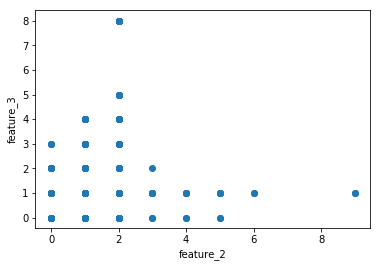

In [16]:
# plotting the scatter plot which shows the correlation between feature_2 and feature_3

fig, ax = plt.subplots(1, 1)

ax.scatter(data.feature_2,data.feature_3)

ax.set_xlabel('feature_2')

ax.set_ylabel('feature_3')

plt.show()

In [17]:
# feature_2 and feature_3 are highly correlated with just one outlier point shown from the plot above 

In [18]:
# Correlation between all features
data.corr()

,target_var,feature_1,feature_2,feature_3,feature_6,feature_7,feature_9
target_var,1.000000,0.244208,0.082660,-0.027825,-0.061300,-0.312469,0.024100
feature_1,0.244208,1.000000,0.221522,0.160224,0.156763,-0.558477,0.019009
feature_2,0.082660,0.221522,1.000000,0.373587,-0.138813,0.018322,0.041958
feature_3,-0.027825,0.160224,0.373587,1.000000,-0.190492,0.060832,0.033437
feature_6,-0.061300,0.156763,-0.138813,-0.190492,1.000000,-0.342329,-0.033105
feature_7,-0.312469,-0.558477,0.018322,0.060832,-0.342329,1.000000,0.023329
feature_9,0.024100,0.019009,0.041958,0.033437,-0.033105,0.023329,1.000000


In [19]:
# We use patsy,statsmodels and scikit packages to build our model

import statsmodels.formula.api as sm
from patsy import dmatrices

# Step 3 - Training and Test Data


In [20]:
# feature_4 is excluded from the formula to avoid overfitting
# Logistic Regression
model_formula = 'target_var ~ feature_1 + feature_2 + C(feature_5) + feature_6 + C(feature_8) + feature_9' 

In [21]:
#we take the first 1047 records to train and the remaining 262 for testing(80/20 split)

data_train = data.iloc[0:1047, :]
data_test = data.iloc[1047 :, :]

In [24]:
y_train,x_train = dmatrices(model_formula, data=data_train, return_type = 'dataframe')

y_test,x_test = dmatrices(model_formula, data=data_test, return_type = 'dataframe')

## Step 4 - Model Build using Logistic Regression

In [25]:
model = sm.Logit(y_train,x_train)

result = model.fit(maxiter = 200)

result.summary()

Optimization terminated successfully.
         Current function value: 0.492852
         Iterations 130


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             target_var   No. Observations:                 1047
Model:                          Logit   Df Residuals:                     1038
Method:                           MLE   Df Model:                            8
Date:                Tue, 24 Sep 2019   Pseudo R-squ.:                  0.2772
Time:                        17:58:17   Log-Likelihood:                -516.02
converged:                       True   LL-Null:                       -713.91
                                        LLR p-value:                 1.492e-80
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               414.0766   9.28e+06   4.46e-05      1.000   -1.82e+07    1.82e+07
C(feature_5)[T.pink]     -2.5851      0.169    -15.256      0.000      -2.917      -2.253
C(feature_8)[T.gamma]  -411.9370   9.28e+06  -4.44e-05      1.000   -1.82e+07    1.82e+07
C(feature_8)[T.qoph]   -413.0995   9.28e+06  -4.45e-05      1.000   -1.82e+07    1.82e+07
C(feature_8)[T.sigma]  -412.5782   9.28e+06  -4.44e-05      1.000   -1.82e+07    1.82e+07
feature_1                 0.0083      0.002      4.300      0.000       0.005       0.012
feature_2                -0.1324      0.104     -1.267      0.205      -0.337       0.072
feature_6                -0.0193      0.006     -3.084      0.002      -0.032      -0.007
feature_9                 0.0003      0.002      0.176      0.860      -0.003       0.003
=========================================================================================
"""

We can see That Maximum Likelihood Estimation has been used to predict the coefficients. The pseudo r square is similar to the r square of linear regression, which is used to measure the goodness of the model. A pseudo r square value between 0.2 and 0.4 is considered good and we have got a value of 0.28 which is good.
From the preceding table, we can see that the feature_2 and feature_9 are significant predictors as their p-values are higher than 0.05.

## Step - 5 Model Rebuild

We'll rebuild the model by using predictors, such as feature_5, feature_1, feature_6 and feature_3 and feature_7 to make the model even better:

In [26]:
formula = 'target_var ~ C(feature_5) + feature_1 + feature_6 + feature_3 + feature_7'

In [27]:
df_train = data.iloc[0:1047, :]
df_test = data.iloc[1047:, :]

In [28]:
y_train,x_train = dmatrices(formula, data=df_train, return_type = 'dataframe')

y_test,x_test = dmatrices(formula, data=df_test, return_type = 'dataframe')

In [29]:
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.466642
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             target_var   No. Observations:                 1047
Model:                          Logit   Df Residuals:                     1041
Method:                           MLE   Df Model:                            5
Date:                Tue, 24 Sep 2019   Pseudo R-squ.:                  0.3156
Time:                        17:58:25   Log-Likelihood:                -488.57
converged:                       True   LL-Null:                       -713.91
                                        LLR p-value:                 3.522e-95
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.5406      0.464      9.786      0.000       3.631       5.450
C(feature_5)[T.pink]    -2.7201      0.175    -15.528      0.000      -3.063      -2.377
feature_1                0.0026      0.002      1.413      0.158      -0.001       0.006
feature_6               -0.0378      0.007     -5.559      0.000      -0.051      -0.024
feature_3               -0.2632      0.106     -2.486      0.013      -0.471      -0.056
feature_7               -0.9478      0.123     -7.697      0.000      -1.189      -0.706
========================================================================================
"""

## Step 6 - Model Evaluation

In [30]:
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

C:\Users\LEGEND\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Predictions')

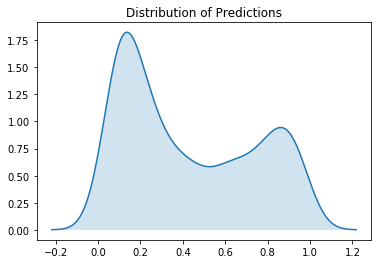

In [31]:
# lets plot the distribution of the predictions on the training data

kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha = 0.2)
plt.title("Distribution of Predictions")

From The preceding plot we can see that the density is high near probabilities 0 and 1,which is a good thing and shows our model is able to predict some patterns from the data.And the density is even higher near 0 which means that lot of zeroes were predicted

## Step - 7 Evaluating a model based on test data

Classification report

In [32]:
# Lets draw a classification report using Sklearn metrics

y_pred = res.predict(x_test)
y_pred_flag = y_pred > 0.7

print(pd.crosstab(y_test.target_var,y_pred_flag,rownames = ['Original'],colnames = ['Predicted']))
print('\n \n')
print(classification_report(y_test,y_pred_flag))

Predicted  False  True 
Original               
0.0          194     13
1.0           41     14

 

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       207
         1.0       0.52      0.25      0.34        55

    accuracy                           0.79       262
   macro avg       0.67      0.60      0.61       262
weighted avg       0.76      0.79      0.77       262




""" Let's break down the concept of what precision and recall mean from the preceding classification report.
PRECISION: Precision tells us that among all the predictions of class 0 or class 1, how many of them have been correctly predicted. So, in the preceding case, 83% of the prediction of outcome 0 is correct and 52% of the prediction of outcome 1 is correct.
RECALL: Recall tells us that out of the actual/original instances, how many of them have been predicted correctly. So, in the preceding case, 0 outcome has been predicted correctly with an accuracy of 94%, but of all the 1 outcomes predicted, only 25% of them have been predicted correctly.
"""


""" Let's break down the concept of what precision and recall mean from the preceding classification report.
PRECISION: Precision tells us that among all the predictions of class 0 or class 1, how many of them have been correctly predicted. So, in the preceding case, 83% of the prediction of outcome 0 is correct and 52% of the prediction of outcome 1 is correct.
RECALL: Recall tells us that out of the actual/original instances, how many of them have been predicted correctly. So, in the preceding case, 0 outcome has been predicted correctly with an accuracy of 94%, but of all the 1 outcomes predicted, only 25% of them have been predicted correctly.
"""

In [33]:
# we use roc_curve from sklearn metrics to measure our accuracy

fpr,tpr,thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr,tpr)

print("Accuracy : %f"% roc_auc)

Accuracy : 0.776856


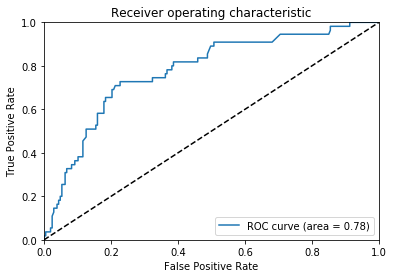

In [34]:
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of 0.5 represents that the model is as good as a random guess.

# #Conclusion specified for non-technical readers


we used Logistic Regression to build this model
Logistic regression is a type of regression analysis that helps in estimating the likelihood of an event to occur based on some given parameters. It is used as a classification technique with a binary outcome(two categories: 0 & 1).
we choose Logistic regression because is easier and yields perferct results for classification problem
And we did the following with it:
• Build a logistic regression model with statsmodels
• Evaluated and test the model

In [35]:
acc_summary = {'Range':['0.90-1','0.80-0.90','0.70-0.80','0.60-0.70','0.50-0.60'],'Category':['This is Excellent(A)','This is Good(B)','Fairly Good(C)','This is Poor(D)','This is Fail(E)']}

In [36]:
Accuracy_Summary = pd.DataFrame(acc_summary)

Accuracy Summary Table


In [37]:
Accuracy_Summary

# This table illustrate the level of a model from good to bad 

,Range,Category
0,0.90-1,This is Excellent(A)
1,0.80-0.90,This is Good(B)
2,0.70-0.80,Fairly Good(C)
3,0.60-0.70,This is Poor(D)
4,0.50-0.60,This is Fail(E)


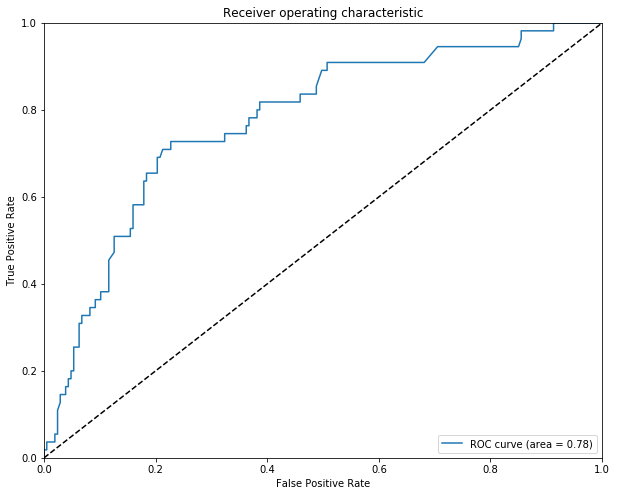

In [38]:
# This plot shows our accuracy 
plt.figure(figsize=(10,8))
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Printing the accuracy

print("Accuracy : %f"% roc_auc)

Accuracy : 0.776856


In [40]:
# And from the preceding plot it shows that we got accurracy of 78 % which is fairly good

# Precesion and recall Explanation

In [41]:
# This below is a classification report

print(classification_report(y_test,y_pred_flag))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       207
         1.0       0.52      0.25      0.34        55

    accuracy                           0.79       262
   macro avg       0.67      0.60      0.61       262
weighted avg       0.76      0.79      0.77       262




PRECISION: Precision tells us that among all the predictions of class 0 or class 1, how many of them have been correctly predicted. So, in the preceding case, 83% of the prediction of outcome 0 is correct and 52% of the prediction of outcome 1 is correct.
RECALL: Recall tells us that out of the actual/original instances, how many of them have been predicted correctly. So, in the preceding case, 0 outcome has been predicted correctly with an accuracy of 94%, but of all the 1 outcomes predicted, only 25% of them have been predicted correctly.

crosstab or confusion matrix explanation

In [42]:
print(pd.crosstab(y_test.target_var,y_pred_flag,rownames = ['Original'],colnames = ['Predicted']))

Predicted  False  True 
Original               
0.0          194     13
1.0           41     14



This follows True False Rate(TPR) = FT/(TP + FN) also called sensitivity
False Positive (FP): This is a positive prediction, which is actually wrong. So, in the preceding crosstab, 13 is False Positive
True Positive (TP): This is a positive prediction, which is actually right. So, in the preceding crosstab, 14 is True Positive
True Negative (TN): This is a negative prediction, which is actually right. So, in the above crosstab, 194 is True Negative
False Negative (FN): This is a negative prediction, which is actually wrong. So, in the preceding cross tab, 41 is False Negative

# Conclusion Summary

Text(0.5, 1.0, 'Distribution of Predictions')

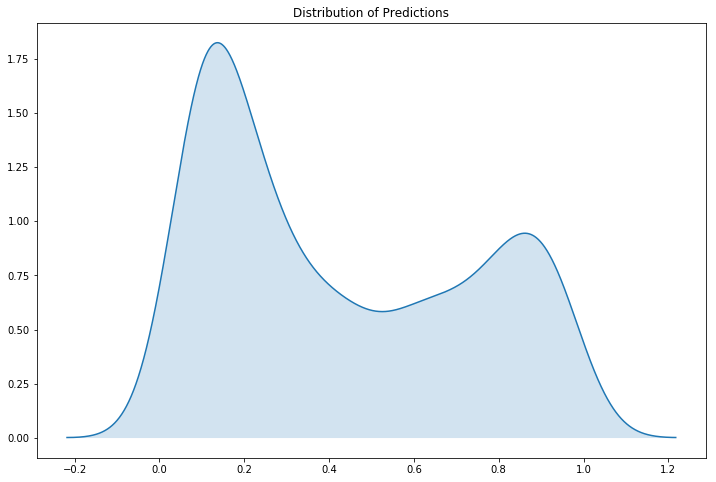

In [45]:
plt.figure(figsize = (12,8))
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha = 0.2)
plt.title("Distribution of Predictions")

This shows that the density is very high near 0 so this means that it costs the company R20 000 per case because a prediction
of 0 is made and therefore cost reductions must be done to save the company some money